In [16]:
#showing with replace
import pandas as pd

people = pd.read_csv("ingresos.csv")

print(people.sample(frac=2/3, replace=True))

    edad  estudio  genero  tipo_trabajo  horas  ingreso
18    17        8       1             0     15        0
55    30       10       0             0     40        0
54    53        1       1             0     40        0
11    31       10       1             0     40        0
88    24        3       1             0     60        0
..   ...      ...     ...           ...    ...      ...
98    37        9       1             0     45        0
64    56        9       1             1     50        0
69    40        9       0             0     40        0
39    37        9       1             1     40        0
72    63       14       1             1     40        1

[67 rows x 6 columns]


In [ ]:
#Randomozed, selection of features for divide, max_features= sqrt(num_features)
from random import sample

print(people.columns[:-1])
print(sample(set(people.columns[:-1]), 3)) #randomized selection of sets from a group of data, is highly recomended to chose quadratic root from the number of features.

In [29]:
from sklearn.ensemble import RandomForestClassifier

#(number_of_trees, criterion{entropy or gini},)
myForest = RandomForestClassifier(n_estimators=100,
                                  criterion= "gini",
                                  max_features="sqrt",
                                  bootstrap=True,
                                  max_samples=2/3,
                                  oob_score=True)

myForest.fit(people[people.columns[:-1]].values, people["ingreso"].values)

print(myForest.predict([[50,16,1,1,40]]))
print("Accuracy: ", myForest.score(people[people.columns[:-1]].values, people["ingreso"].values))

print("Out of back: ",myForest.oob_score_)#out of back, to test data that wasn't used to train trees, data that stayed out of metrics

[1]
Accuracy:  0.98
Out of back:  0.79


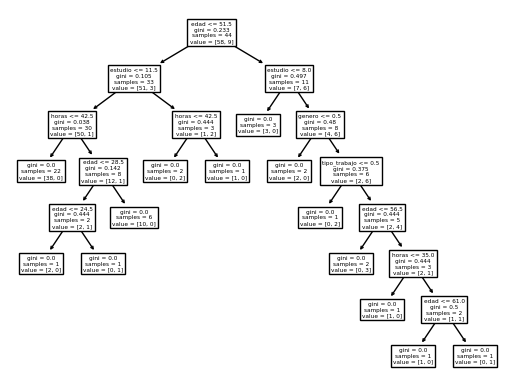

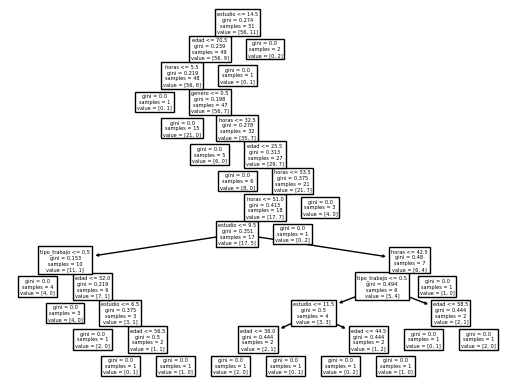

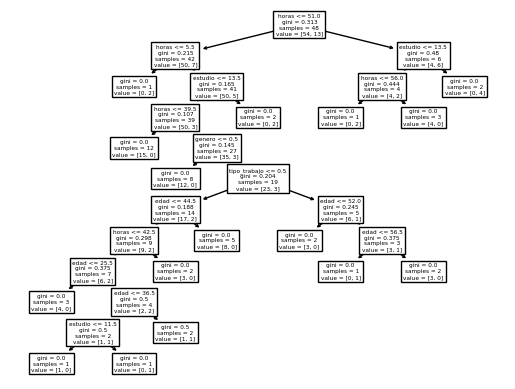

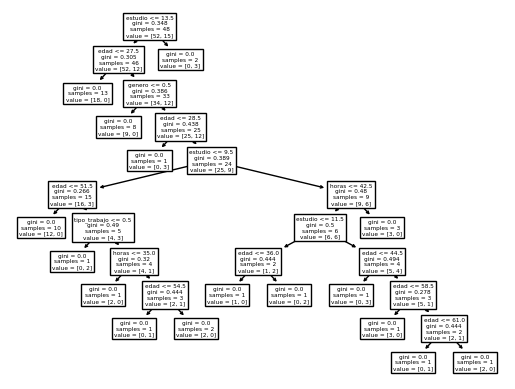

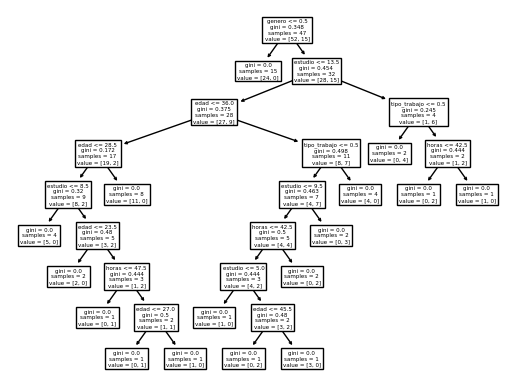

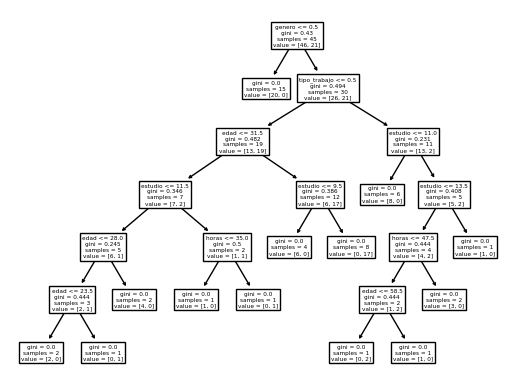

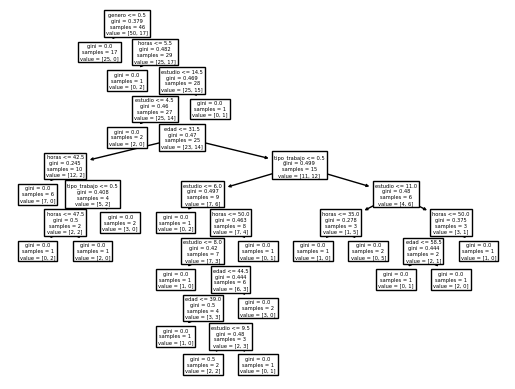

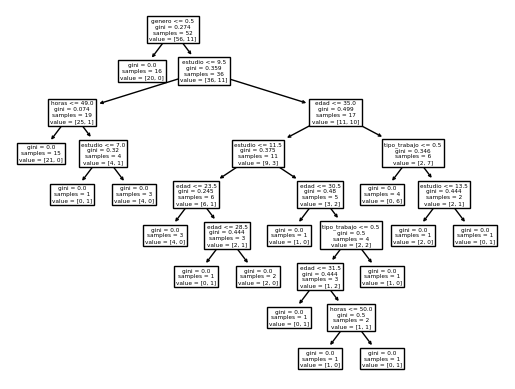

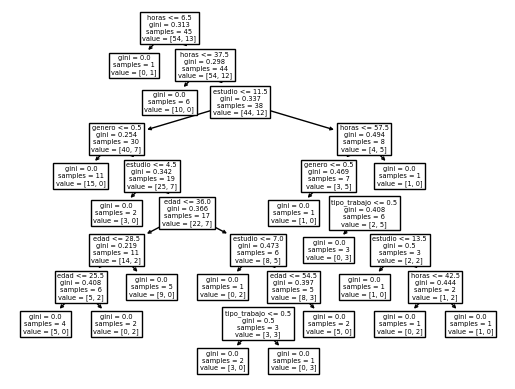

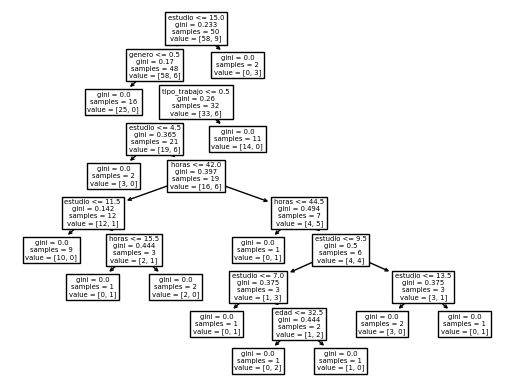

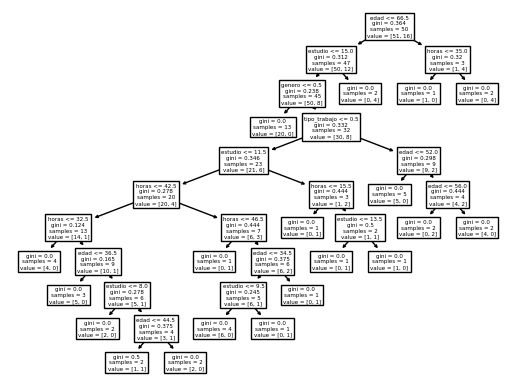

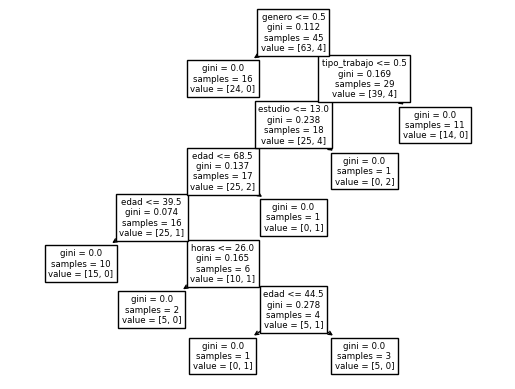

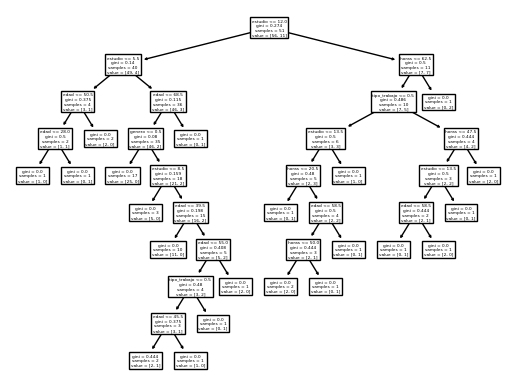

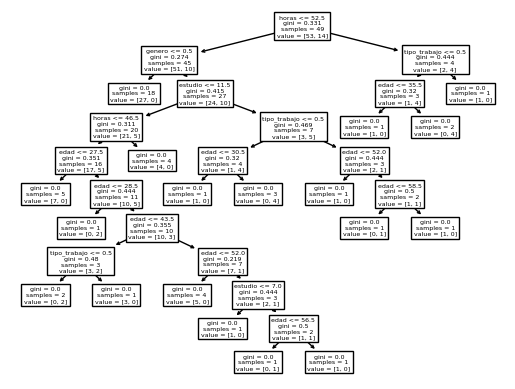

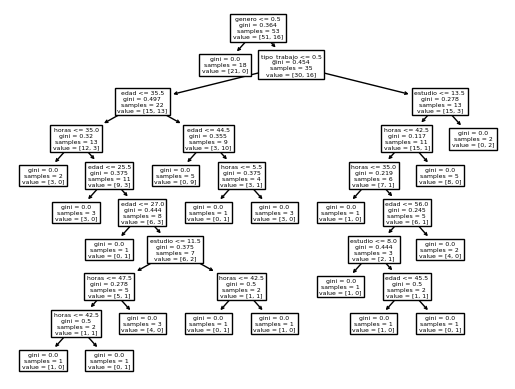

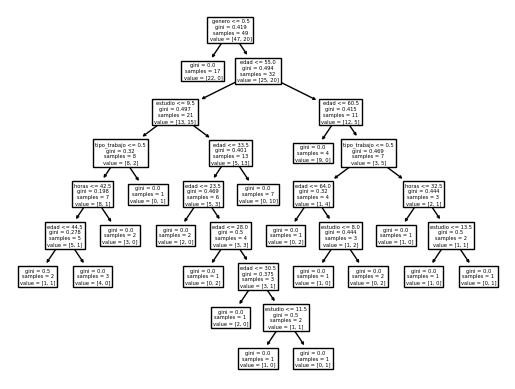

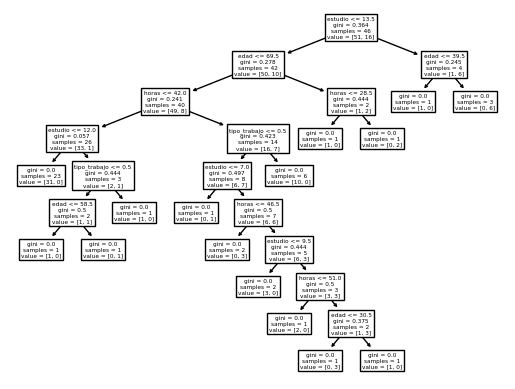

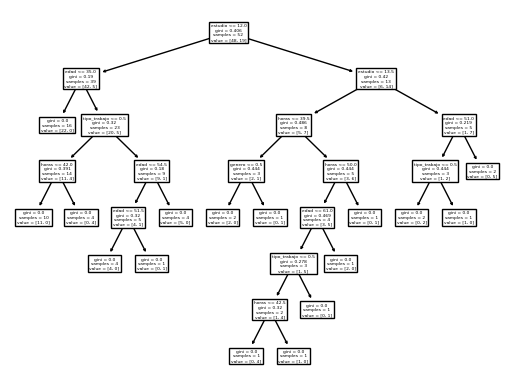

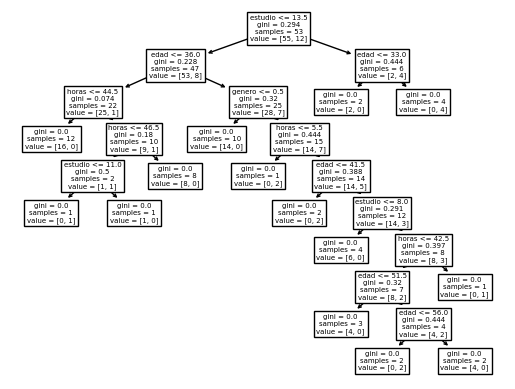

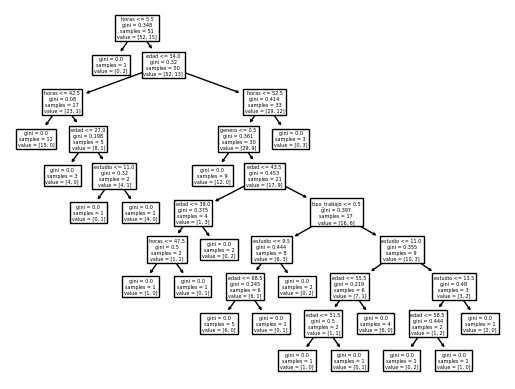

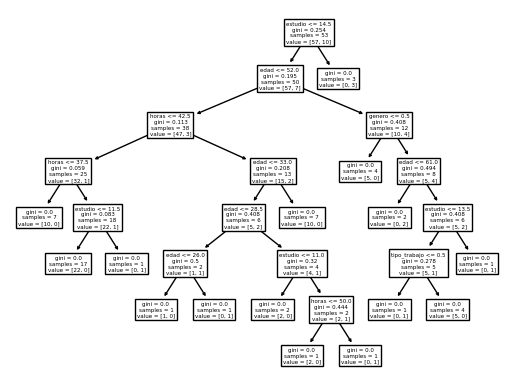

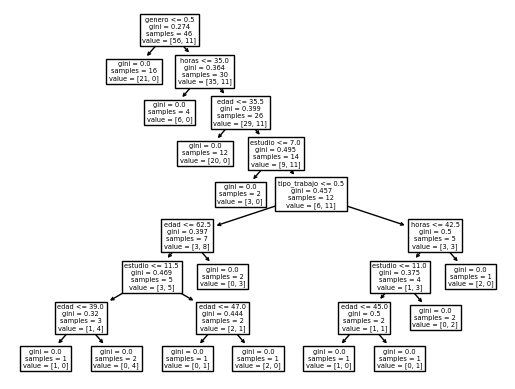

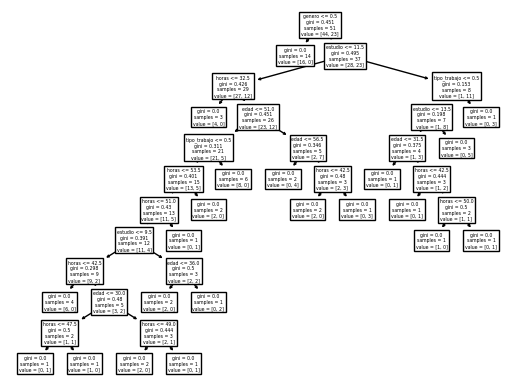

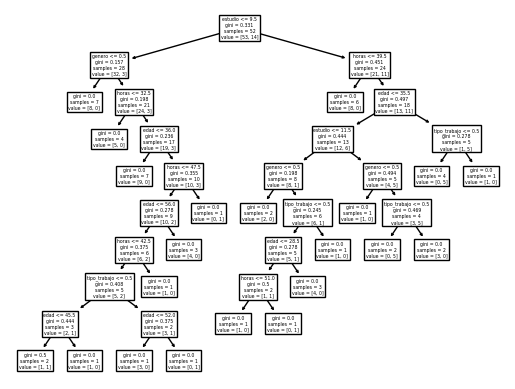

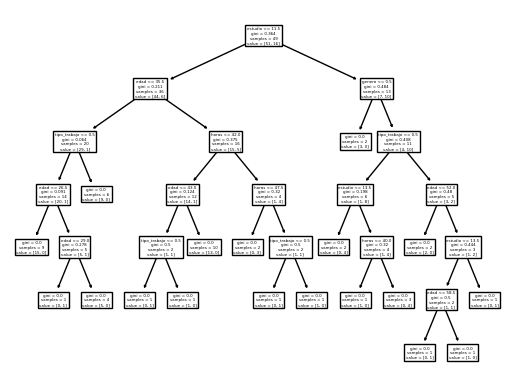

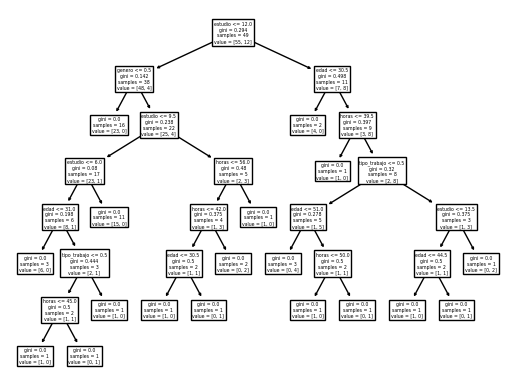

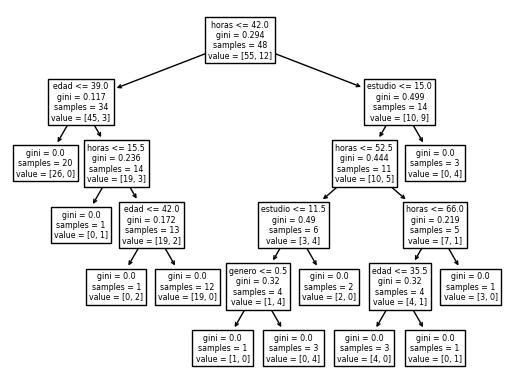

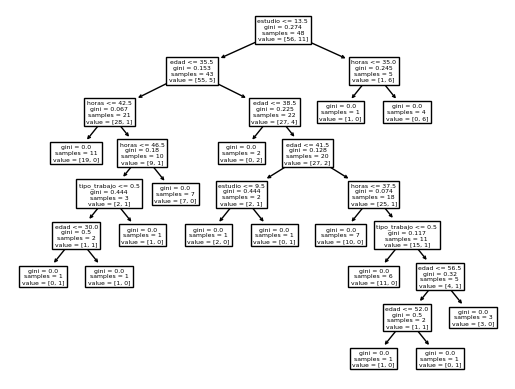

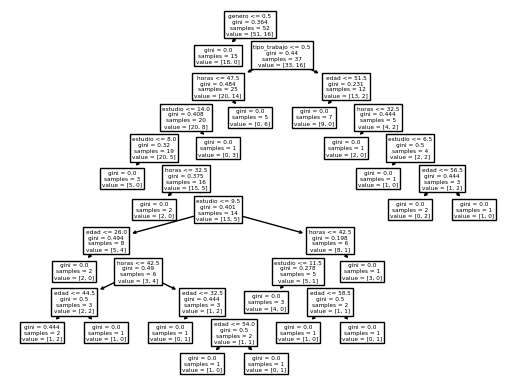

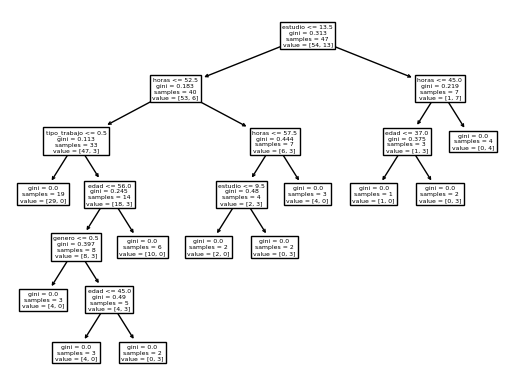

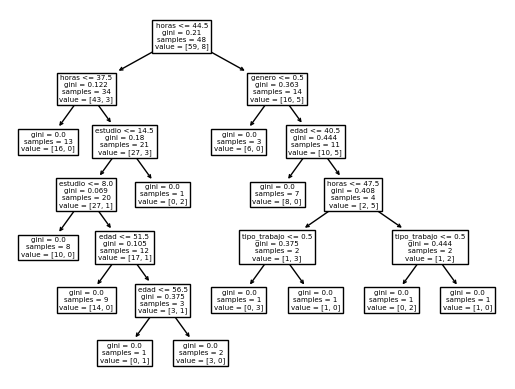

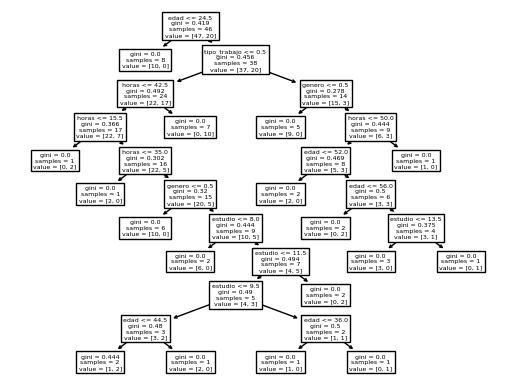

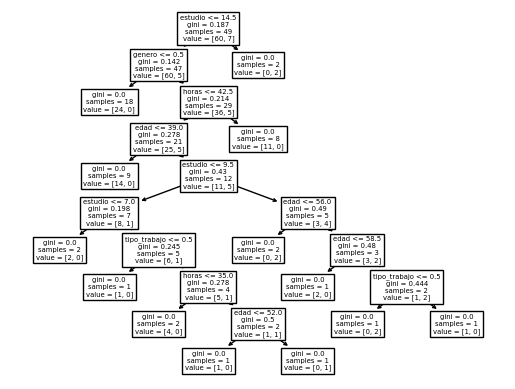

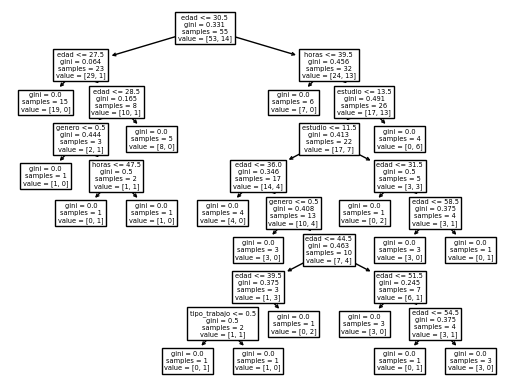

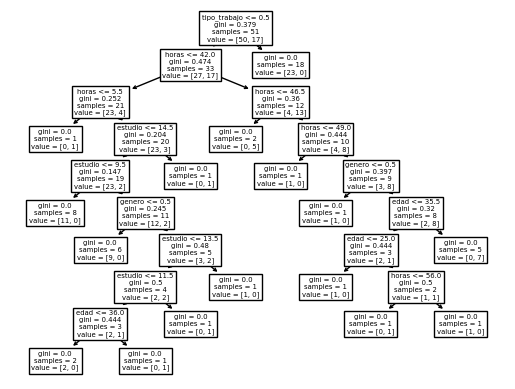

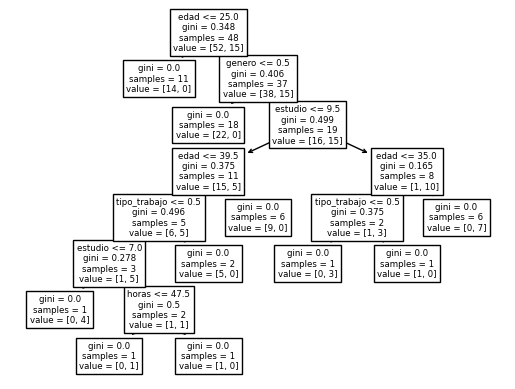

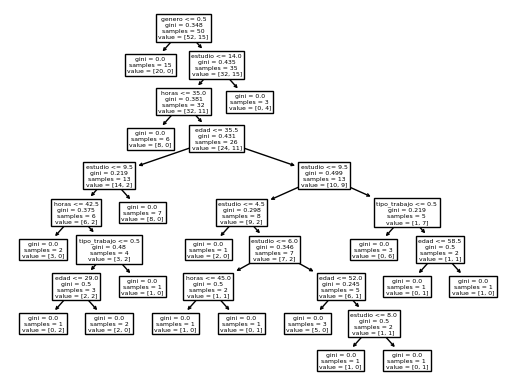

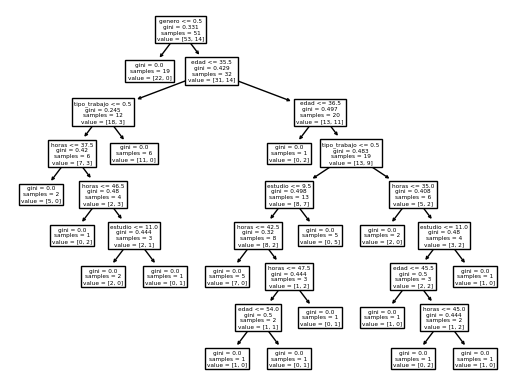

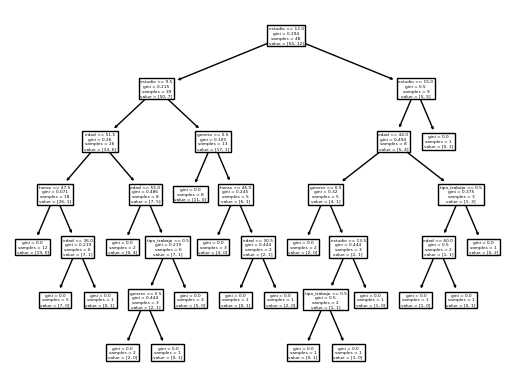

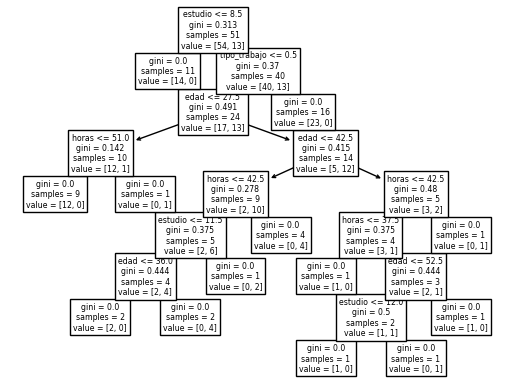

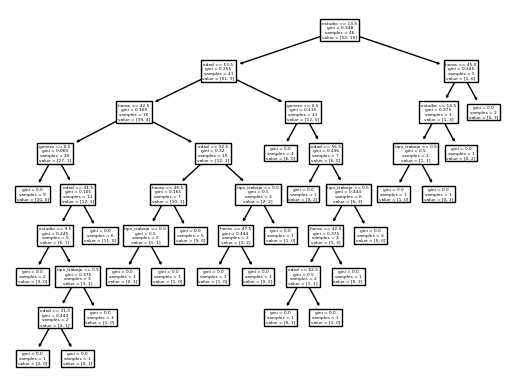

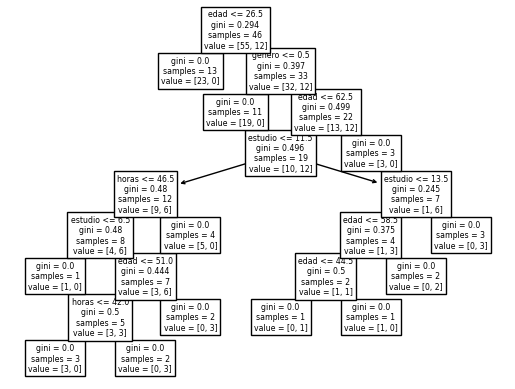

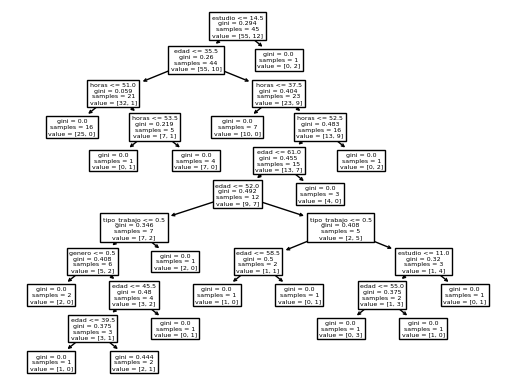

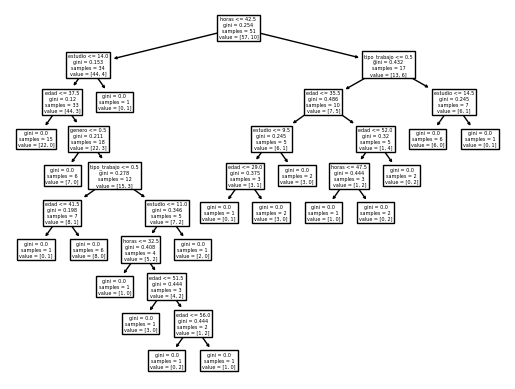

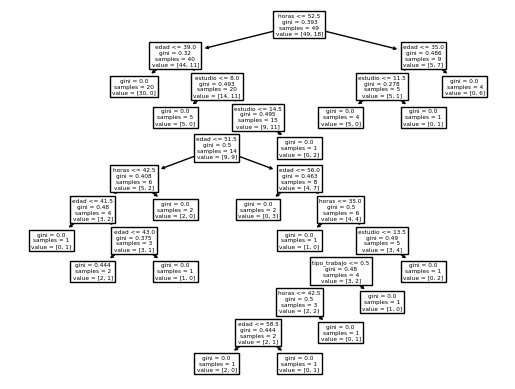

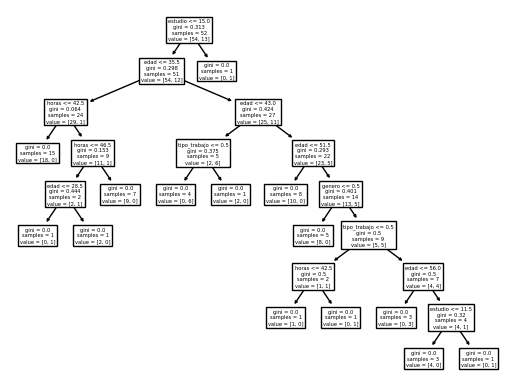

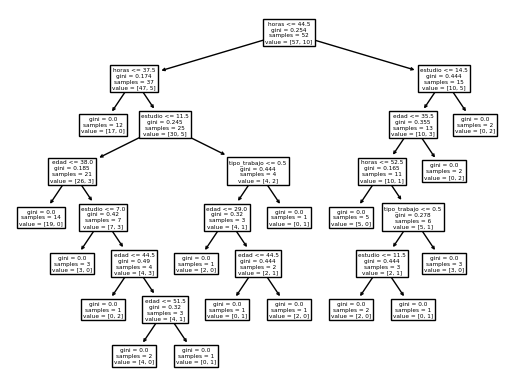

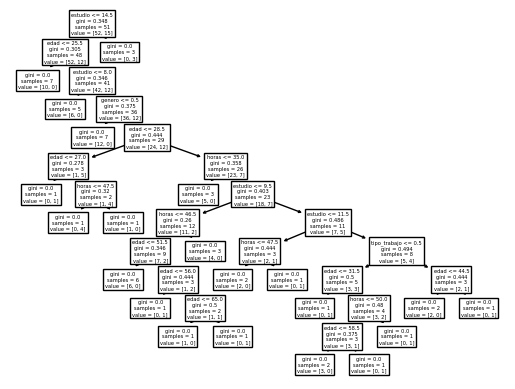

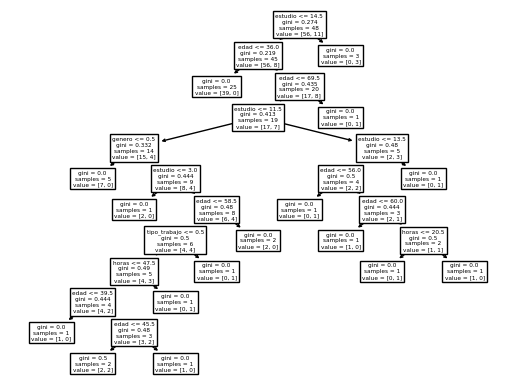

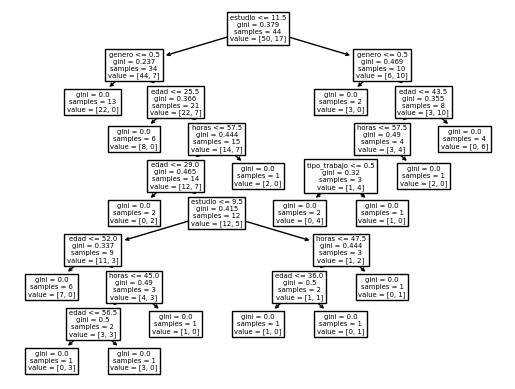

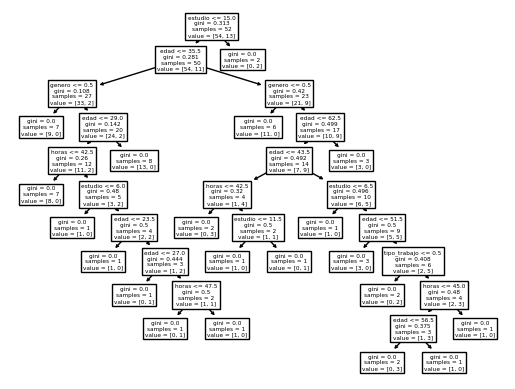

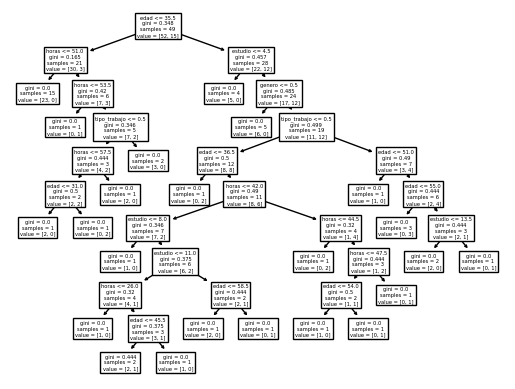

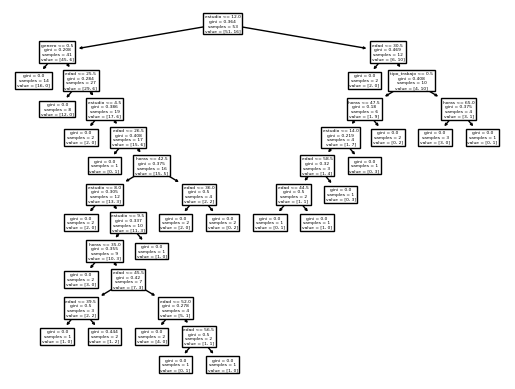

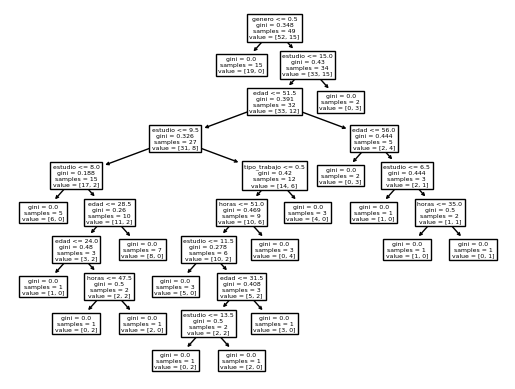

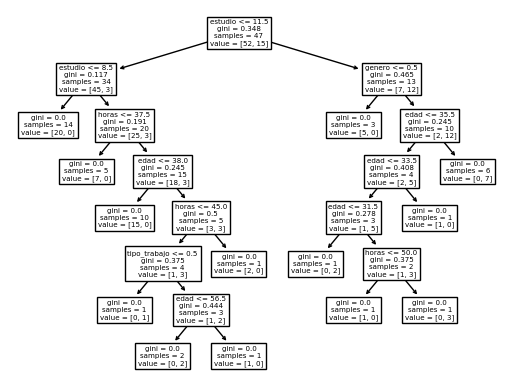

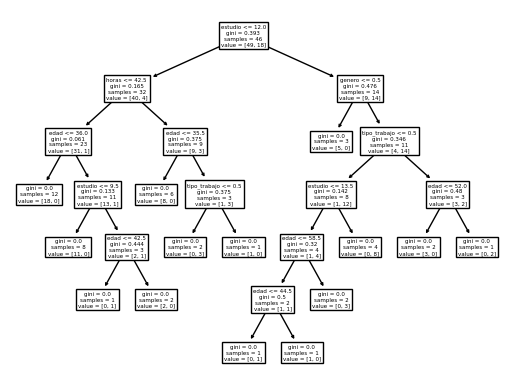

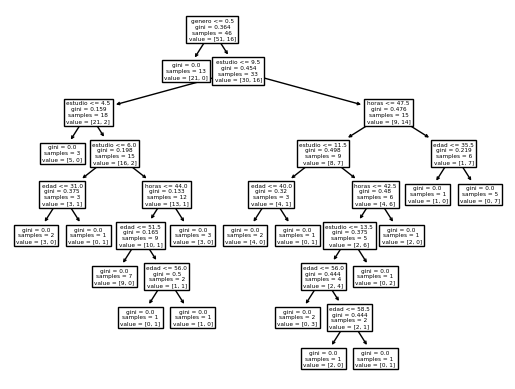

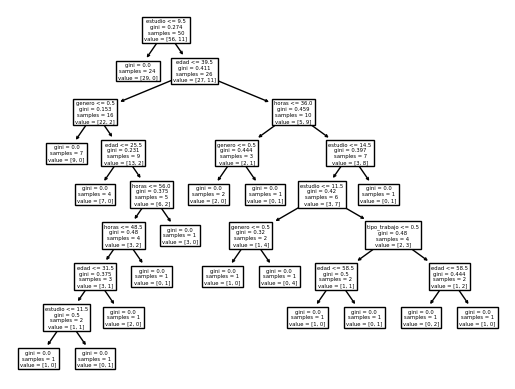

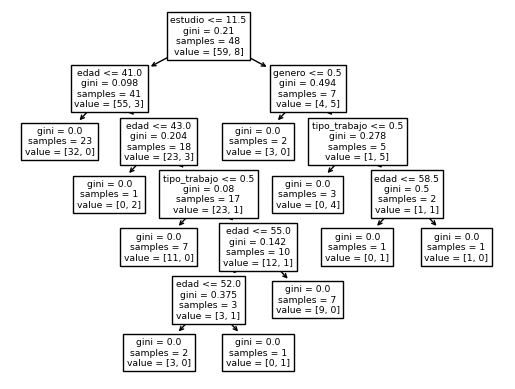

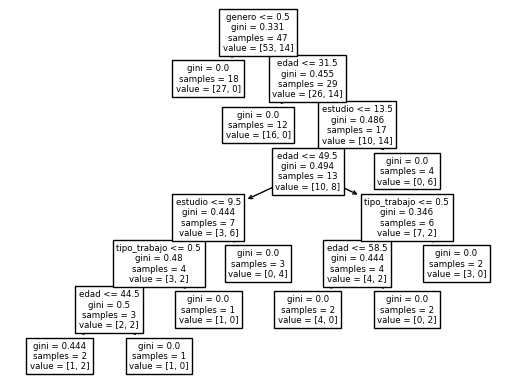

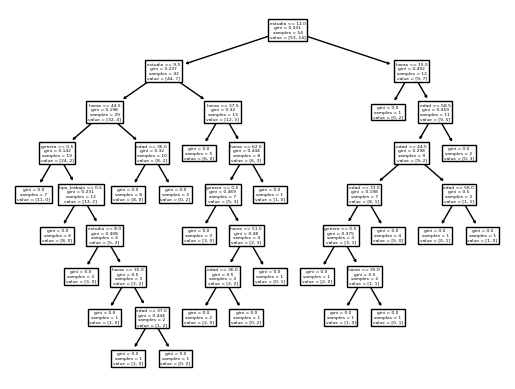

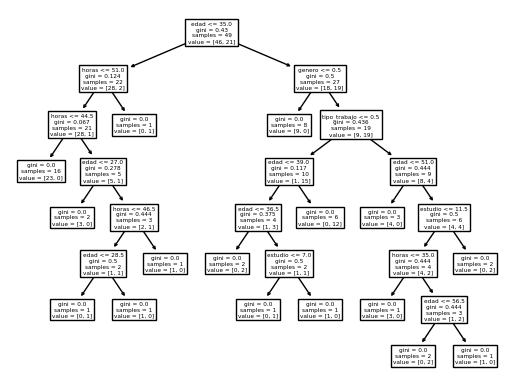

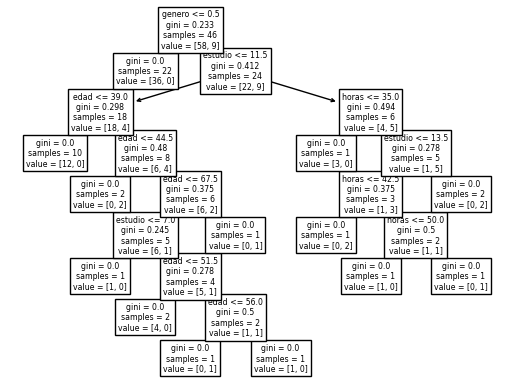

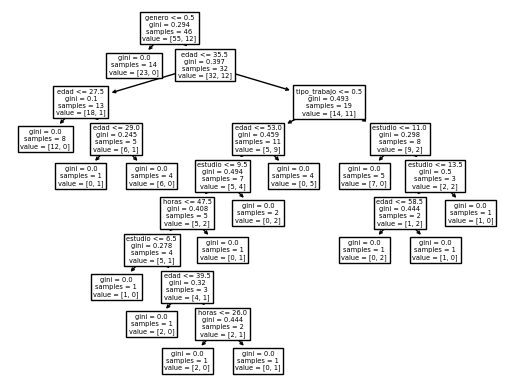

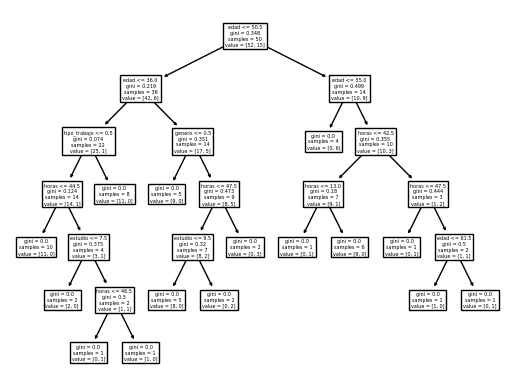

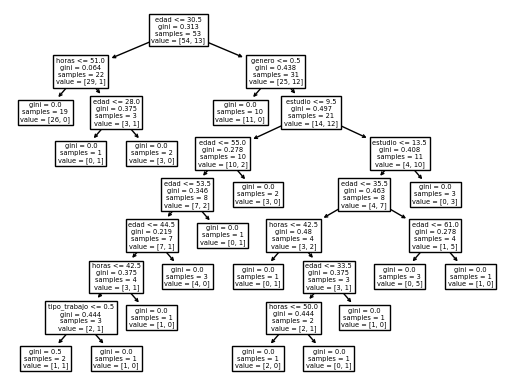

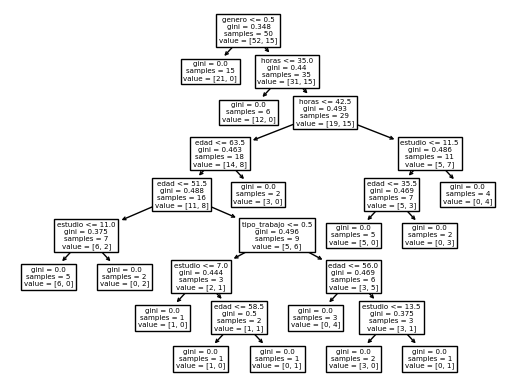

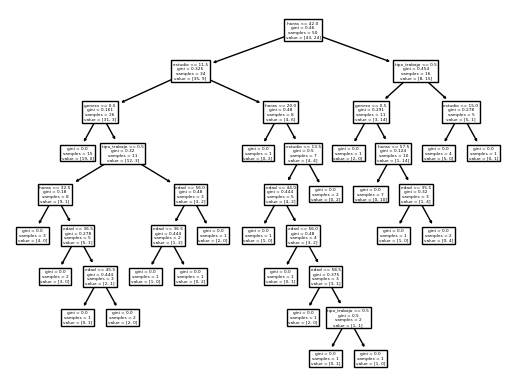

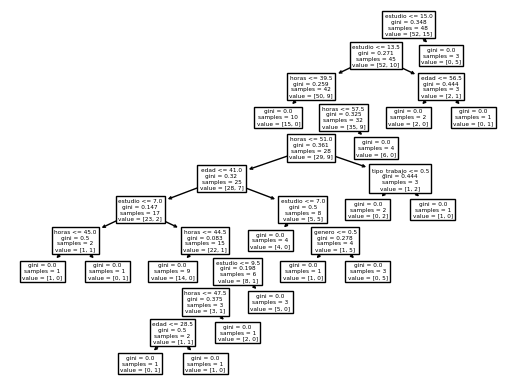

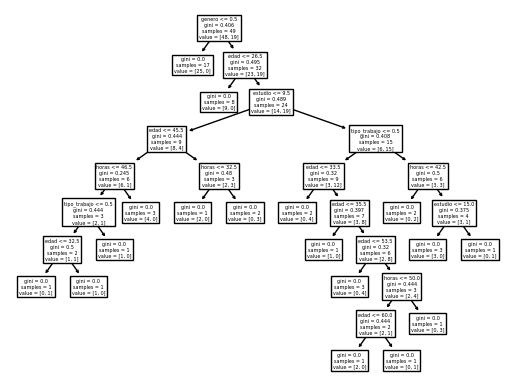

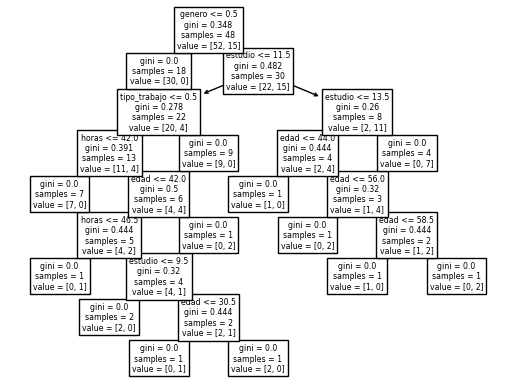

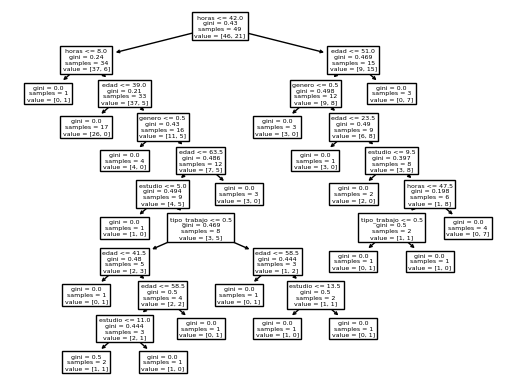

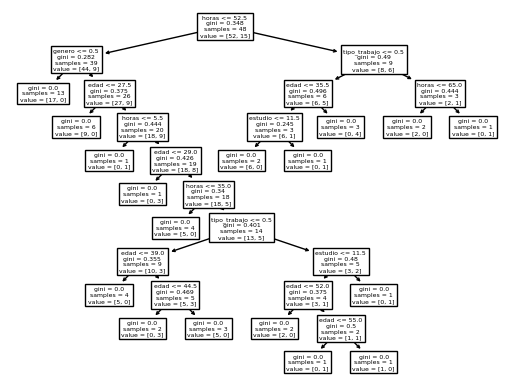

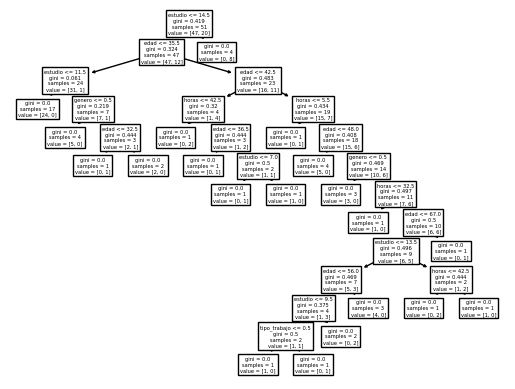

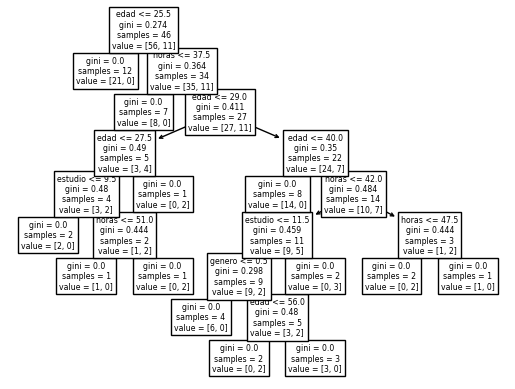

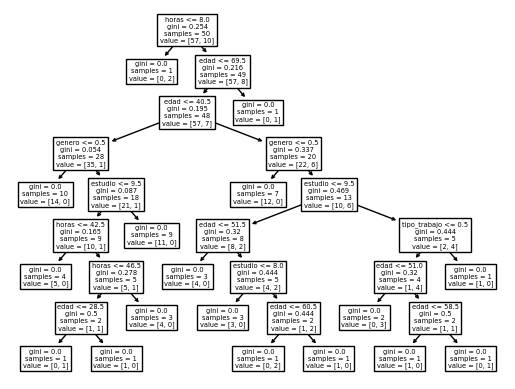

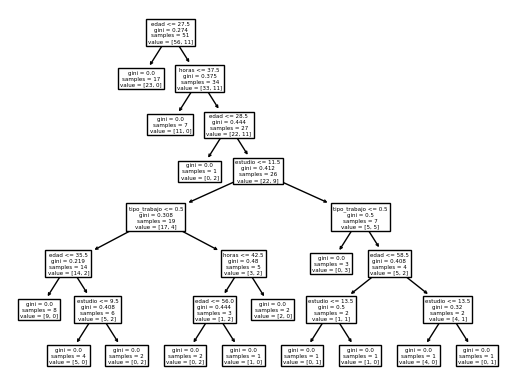

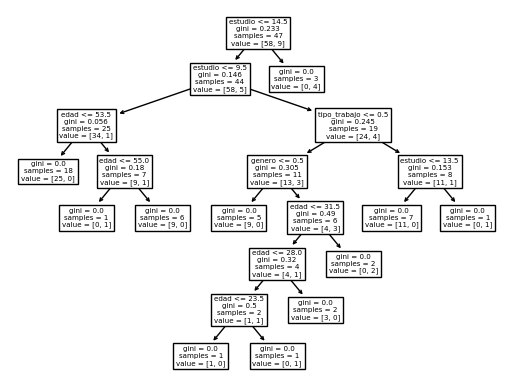

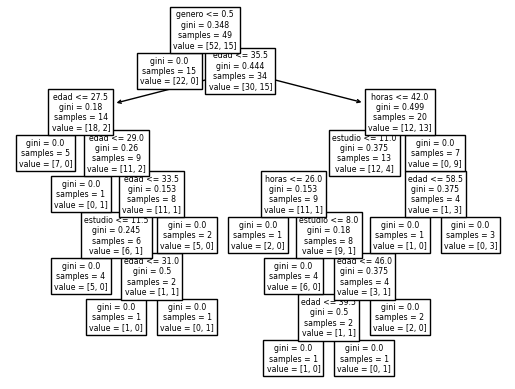

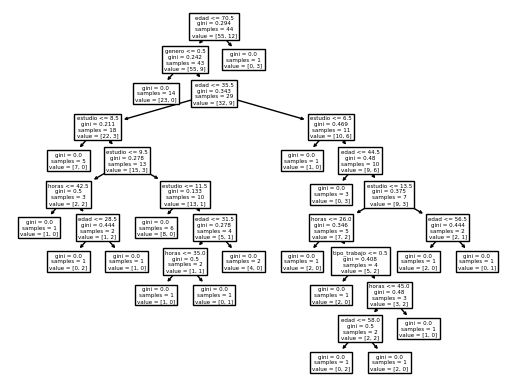

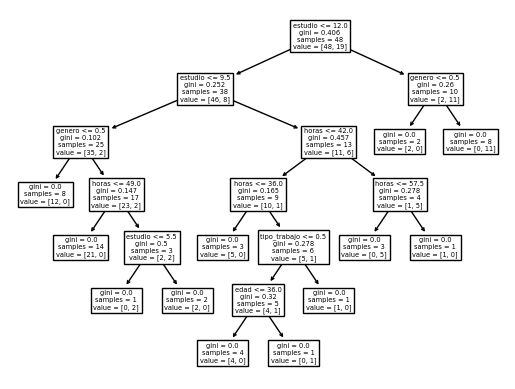

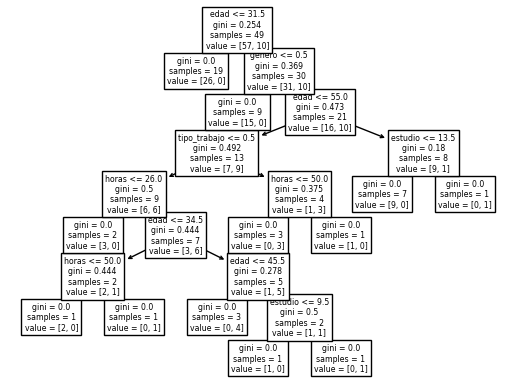

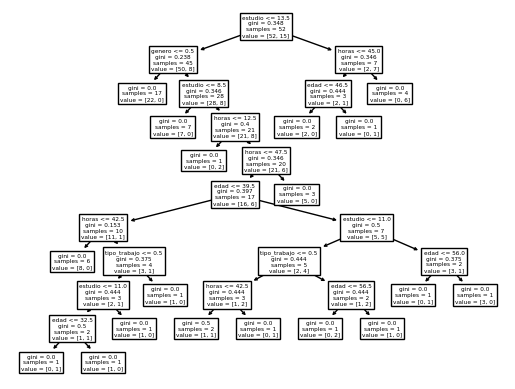

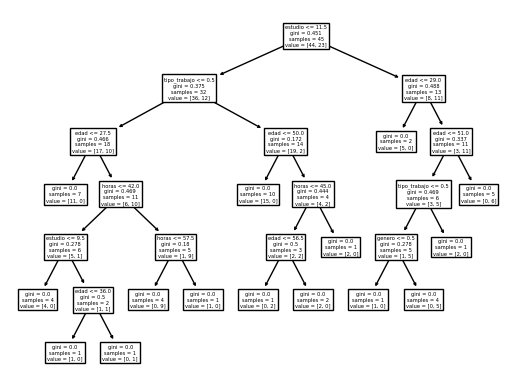

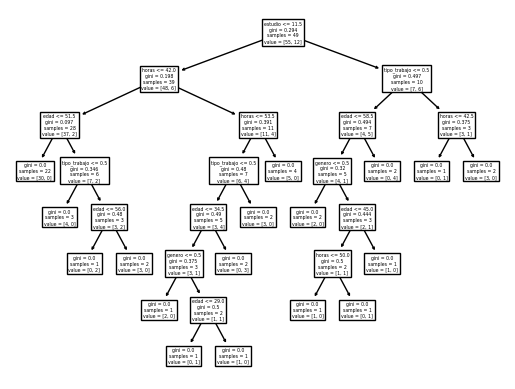

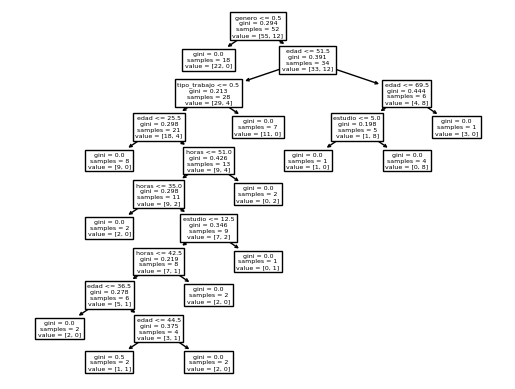

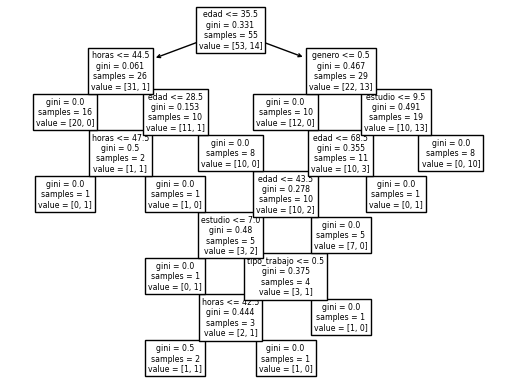

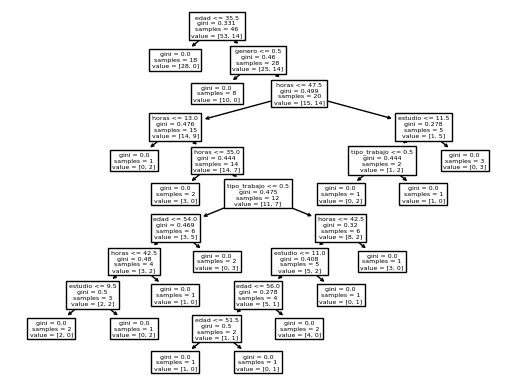

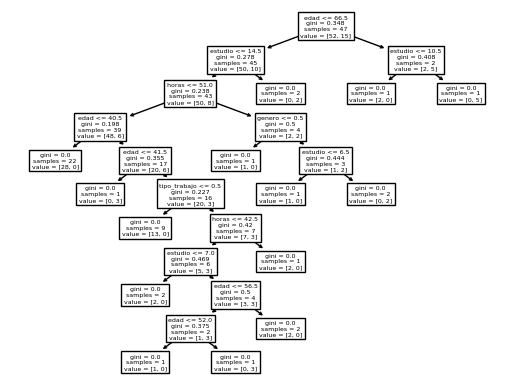

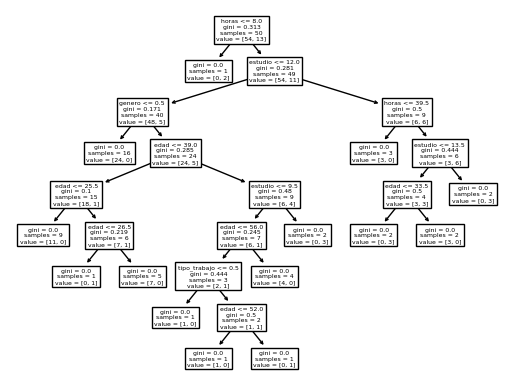

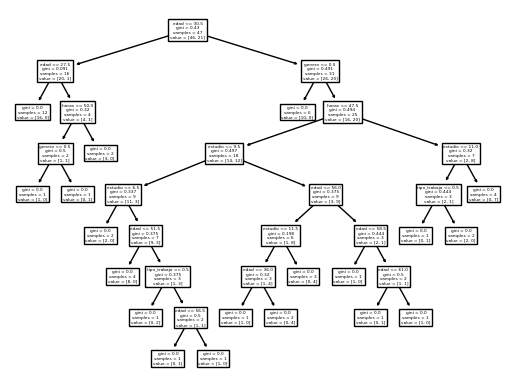

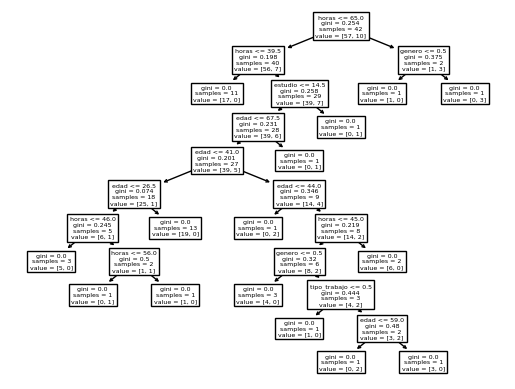

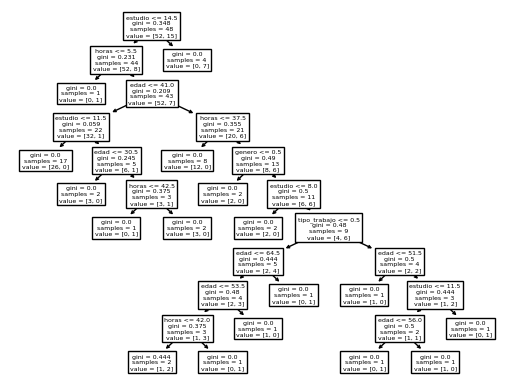

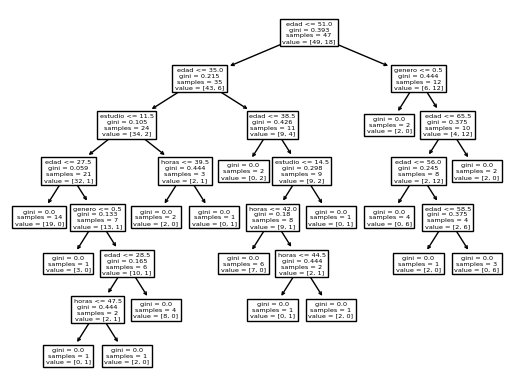

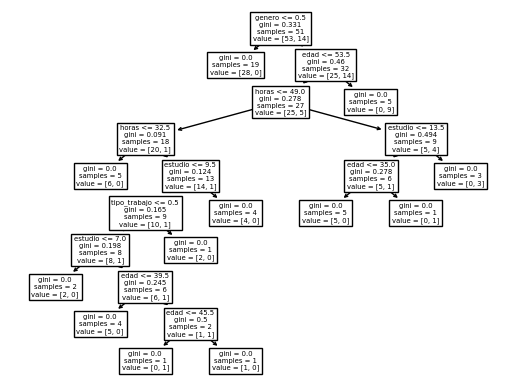

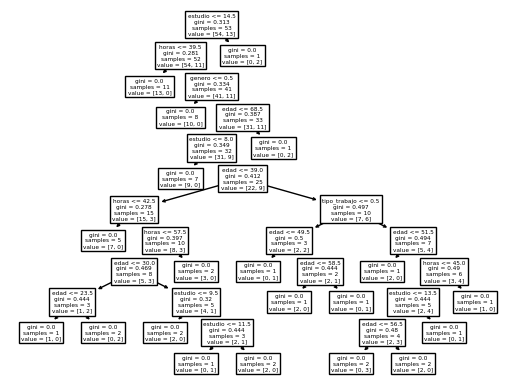

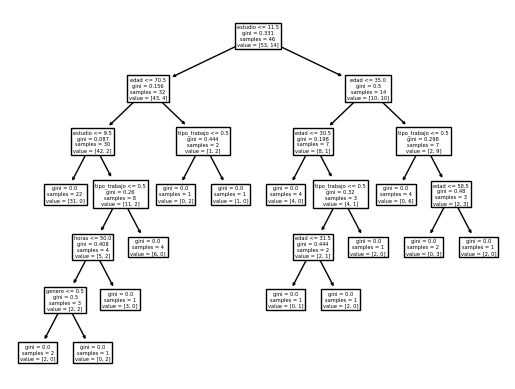

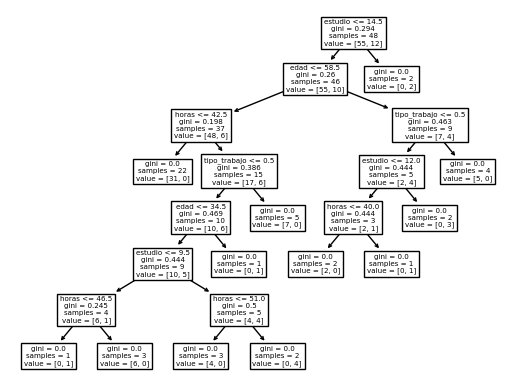

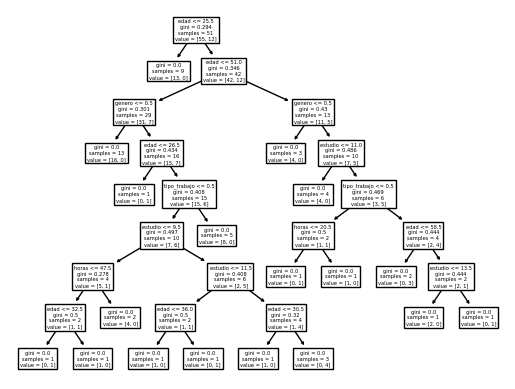

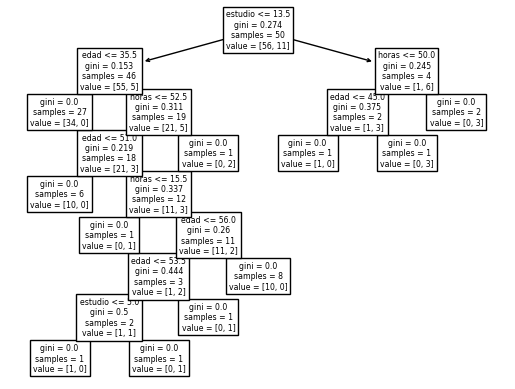

In [31]:
#view of randimized forest
import matplotlib.pyplot as plt
from sklearn import tree

for arbol in myForest.estimators_:
  tree.plot_tree(arbol, feature_names=people.columns[:-1])
  plt.show()

